# Machine Learning assignment 

In this notebook we are goint to predict whether a person is going to survive or not. In order to do that we are going to compare the two following algorithms:
* **Logistic Regression**  
* **Decision Tree**


 ## Logistic Regression
 
 

Use the same import as the refered notebook and the same way to preprocess and split the dataset

In [1]:
# General import and load data
import pandas as pd
import numpy as np

from pandas import Series, DataFrame

# Training and test spliting
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  

# Evaluation
from sklearn import metrics
from sklearn.cross_validation import cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Optimization
from sklearn.grid_search import GridSearchCV

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)


/opt/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
#We get a URL with raw content (not HTML one)
url="https://raw.githubusercontent.com/gsi-upm/sitc/master/ml2/data-titanic/train.csv"
df = pd.read_csv(url)
df.head()

#Fill missing values
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Sex'].fillna('male', inplace=True)
df['Embarked'].fillna('S', inplace=True)

# Encode categorical variables
df['Age'] = df['Age'].fillna(df['Age'].median())
df.loc[df["Sex"] == "male", "Sex"] = 0
df.loc[df["Sex"] == "female", "Sex"] = 1
df.loc[df["Embarked"] == "S", "Embarked"] = 0
df.loc[df["Embarked"] == "C", "Embarked"] = 1
df.loc[df["Embarked"] == "Q", "Embarked"] = 2

# Drop colums
df.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

#Show proprocessed df
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [3]:
#Check types are numeric
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object

In [4]:
df['Sex'] = df['Sex'].astype(np.int64)
df['Embarked'] = df['Embarked'].astype(np.int64)
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object

In [5]:
#Check there are not missing values
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
dtype: bool

In [6]:
# Features of the model
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
# Transform dataframe in numpy arrays
X = df[features].values
y = df['Survived'].values

# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)


Make an instance of the Model and train the Model on the data, storing the information learned from the data itself.

In [7]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Uses the information the model learned during the model training process, making predictions on entire test data

In [8]:
y_pred = logisticRegr.predict(X_test)  

**Measuring Model Performance**
There are several ways of measuring model performance (precision, recall, F1 Score, ROC Curve, etc).
To do this are going to see how the model performs on the new data (test set)

 The simplest one is Accuracy and it is defined as:

(fraction of correct predictions): correct predictions / total number of data points

In [9]:
# Use score method to get accuracy of model
accuracy = logisticRegr.score(X_test, y_test)
print(accuracy)

0.8251121076233184


We can obtain more information from the confusion matrix  and the metric F1-score. 

In [10]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[118  16]
 [ 23  66]]


In [11]:
# Report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.84      0.88      0.86       134
          1       0.80      0.74      0.77        89

avg / total       0.82      0.83      0.82       223



ROC (Receiver Operating Characteristic ) and AUC (Area Under the Curve)¶
 An ROC curve demonstrates several things including:
* It shows the tradeoff between sensitivity and specificity.
* The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test. (Vice-versa for the closer the curve comes to the 45-degree diagonal).

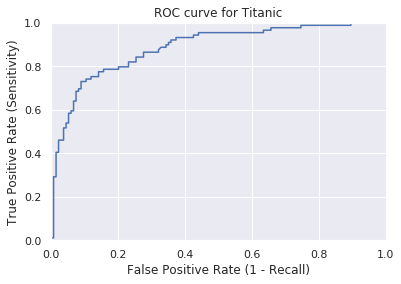

In [12]:
y_pred_prob = logisticRegr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Titanic')
plt.xlabel('False Positive Rate (1 - Recall)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. It helps to select a threshold to balance sensitivity and recall.

The accuracy of the test depends on how well the test separates the group being tested into those with and without the disease in question.

In [13]:
#Function to evaluate thresholds of the ROC curve
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Recall:', 1 - fpr[thresholds > threshold][-1])

In [14]:
evaluate_threshold(0.5)

('Sensitivity:', 0.7415730337078652)
('Recall:', 0.8805970149253731)


In [15]:
# AUC
print(roc_auc_score(y_test, y_pred))

0.8110850243166191


So according to the traditional academic point system, the accuracy is good

Train and Evaluate with K-Fold

In [16]:
# This step will take some time
# Cross-validation
cv = KFold(X.shape[0], n_folds=5, shuffle=False, random_state=33)
# StratifiedKFold has is a variation of k-fold which returns stratified folds:
# each set contains approximately the same percentage of samples of each target class as the complete set.
#cv = StratifiedKFold(y, n_folds=3, shuffle=False, random_state=33)
scores = cross_val_score(logisticRegr, X, y, cv=cv)
print("Scores in every iteration", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


('Scores in every iteration', array([0.79329609, 0.80337079, 0.7752809 , 0.75280899, 0.83707865]))
Accuracy: 0.79 (+/- 0.06)


## Decision Tree


Let's try to find out what is the best value for the max_depth parameter
The max_depth parameter is the maximum depth of the tree. 

Text(0,0.5,'Accuracy')

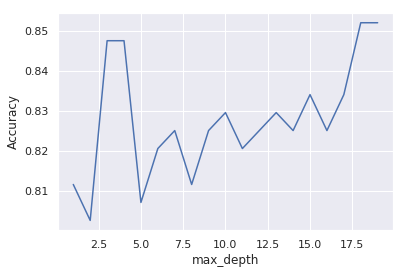

In [17]:
k_range = range(1, 20)

max_depth=3
random_state=1

# Create decision tree model
accuracy = []
for k in k_range:   
    m = DecisionTreeClassifier(max_depth=k, random_state=random_state)
    m.fit(X_train, y_train)
    y_test_pred = m.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, y_test_pred))
plt.plot(k_range, accuracy)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

It seems like the best value are 3 and 4, and since they are not so big we can avoid overfitting for this model.
So let's use 3 for the accuracy measures.

### Training and Predictions

In [18]:
classifier = DecisionTreeClassifier(max_depth=3, random_state=1)  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [19]:
y_pred = classifier.predict(X_test)  


#### Accuracy

In [20]:
# Accuracy
metrics.accuracy_score(y_test, y_pred)

0.8475336322869955

Which is better than the previuos model(0.8251121076233184)

In [21]:
# Confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))

[[122  12]
 [ 22  67]]


Is more or less similar to the one above

In [22]:
# Report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.85      0.91      0.88       134
          1       0.85      0.75      0.80        89

avg / total       0.85      0.85      0.85       223



Even these parameters are slightly better.


#### ROC (Receiver Operating Characteristic ) and AUC (Area Under the Curve)


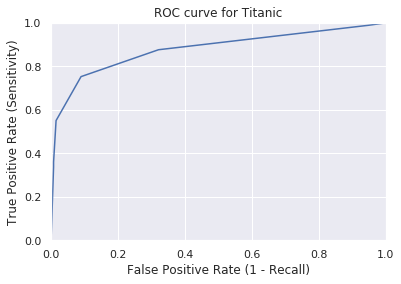

In [23]:
y_pred_prob = classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Titanic')
plt.xlabel('False Positive Rate (1 - Recall)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [24]:
#Threshold used by the decision function, thresholds[0] is the number of 
thresholds

array([1.98550725, 0.98550725, 0.88888889, 0.88461538, 0.57303371,
       0.34482759, 0.10967742, 0.10526316])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f713c603e90>,
      dtype=object)

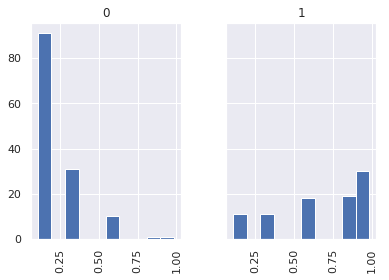

In [25]:
#Histogram of probability vs actual
dprob = pd.DataFrame(data = {'probability':y_pred_prob, 'actual':y_test})
dprob.probability.hist(by=dprob.actual, sharex=True, sharey=True)


In [26]:
#Function to evaluate thresholds of the ROC curve
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Recall:', 1 - fpr[thresholds > threshold][-1])
    

evaluate_threshold(0.74)

('Sensitivity:', 0.550561797752809)
('Recall:', 0.9850746268656716)


In [27]:
evaluate_threshold(0.5)

('Sensitivity:', 0.7528089887640449)
('Recall:', 0.9104477611940298)


**Area Under the Curve** is equal to the probability that a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one

In [28]:
# AUC 
print(roc_auc_score(y_test, y_pred))

0.8316283749790373


##### Train and Evaluate with K-Fold

In [29]:
# This step will take some time
# Cross-validation
cv = KFold(X.shape[0], n_folds=5, shuffle=False, random_state=33)
# StratifiedKFold has is a variation of k-fold which returns stratified folds:
# each set contains approximately the same percentage of samples of each target class as the complete set.
#cv = StratifiedKFold(y, n_folds=3, shuffle=False, random_state=33)
scores = cross_val_score(classifier, X, y, cv=cv)
print("Scores in every iteration", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


('Scores in every iteration', array([0.81564246, 0.81460674, 0.80337079, 0.76966292, 0.83146067]))
Accuracy: 0.81 (+/- 0.04)


## Conclusion

In this notebook we try to compare two different Classification Algorithms in order implement a model able to predict whether a person is going to survive or not.

Logistic regression models search for a single linear decision boundary in afeature space, while decision tree models partition the feature space into half-spaces using axis-aligned linear decision boundaries. 

We figured out that analsysing the Accuracy of the two models, decision tree is resulted slightly better than the logistic regression.